SAMPLE DOCUMENTS
1. understanding machine learning is so hard
2. the king rule the kingdom of morocco
3. I love machine learning and artificial intelligence
4. Machine learning is amazing for data science
5. I love deep learning and neural networks
6. Deep learning is a subset of machine learning
7. Natural language processing uses machine learning
8. Artificial intelligence includes machine learning
9. this women think she is a queen

1. BAG OF WORDS (BoW)

Vocabulary (34 words):
['amazing' 'and' 'artificial' 'data' 'deep' 'for' 'hard' 'includes'
 'intelligence' 'is' 'king' 'kingdom' 'language' 'learning' 'love'
 'machine' 'morocco' 'natural' 'networks' 'neural' 'of' 'processing'
 'queen' 'rule' 'science' 'she' 'so' 'subset' 'the' 'think' 'this'
 'understanding' 'uses' 'women']

Bag of Words Matrix:
      amazing  and  artificial  data  deep  for  hard  includes  intelligence  \
Doc1        0    0           0     0     0    0     1         0             0   
Doc2        0    0        

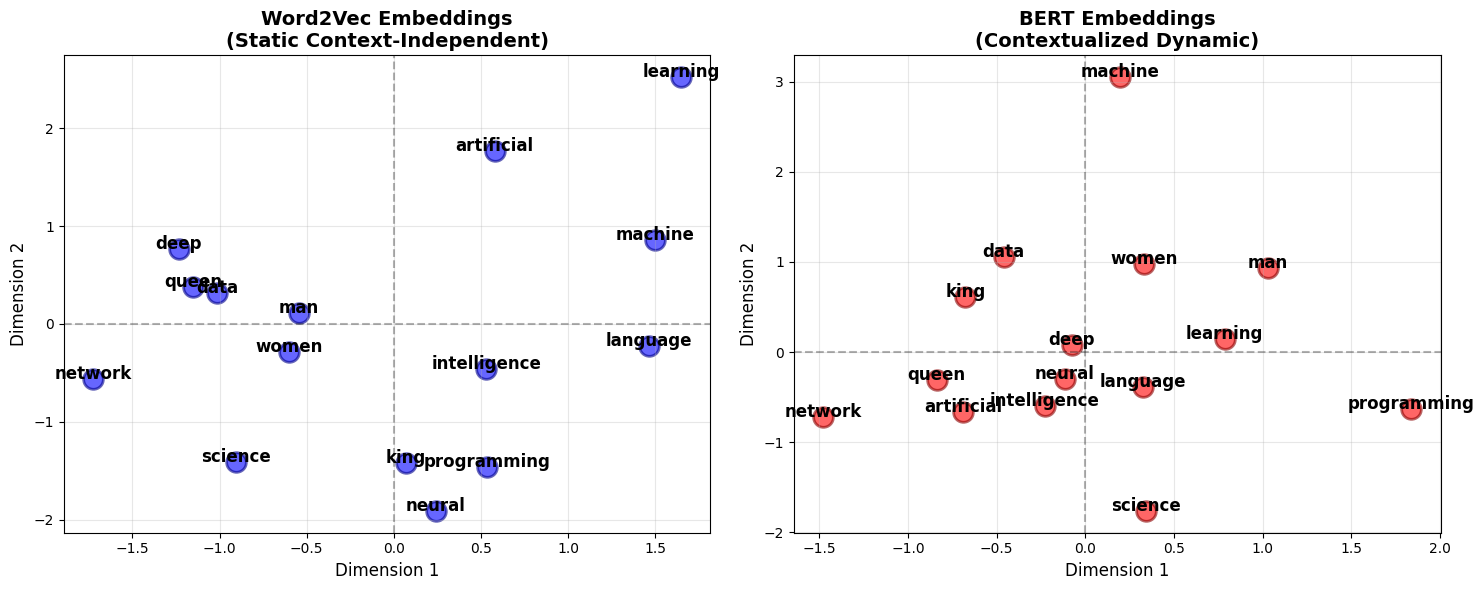


KEY DIFFERENCES: Word2Vec vs BERT
     Aspect           Word2Vec                  BERT
Vector Type       Static/Dense        Contextualized
 Dimensions            100-300              768/1024
    Context       Fixed window         Bidirectional
  Same Word Same vector always Different per context
   Training     CBOW/Skip-gram       Masked LM + NSP
      Speed               Fast                Slower
   Use Case    Word similarity     Complex NLP tasks

EXAMPLE: Why BERT is Contextualized

Sentence 1: 'I went to the bank to deposit money'
Sentence 2: 'I sat by the river bank'

Word2Vec: 'bank' has the SAME vector in both sentences
BERT: 'bank' has DIFFERENT vectors based on context!

DEMO COMPLETE!


In [5]:
"""
NLP Text Representation Techniques: Live Coding Demo
- Bag of Words (BoW)
- TF-IDF
- Word Embeddings (Word2Vec vs BERT)
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns

# Sample corpus
documents = [
    "understanding machine learning is so hard",
    "the king rule the kingdom of morocco",
    "I love machine learning and artificial intelligence",
    "Machine learning is amazing for data science",
    "I love deep learning and neural networks",
    "Deep learning is a subset of machine learning",
    "Natural language processing uses machine learning",
    "Artificial intelligence includes machine learning",
    "this women think she is a queen"
]

print("="*70)
print("SAMPLE DOCUMENTS")
print("="*70)
for i, doc in enumerate(documents, 1):
    print(f"{i}. {doc}")

# ============================================================================
# 1. BAG OF WORDS (BoW)
# ============================================================================
print("\n" + "="*70)
print("1. BAG OF WORDS (BoW)")
print("="*70)

bow_vectorizer = CountVectorizer()
bow_matrix = bow_vectorizer.fit_transform(documents)

# Display vocabulary
vocabulary = bow_vectorizer.get_feature_names_out()
print(f"\nVocabulary ({len(vocabulary)} words):")
print(vocabulary)

# Create DataFrame for better visualization
bow_df = pd.DataFrame(
    bow_matrix.toarray(),
    columns=vocabulary,
    index=[f'Doc{i+1}' for i in range(len(documents))]
)

print("\nBag of Words Matrix:")
print(bow_df)
print(f"\nMatrix Shape: {bow_matrix.shape}")
print(f"Sparsity: {1 - (bow_matrix.nnz / (bow_matrix.shape[0] * bow_matrix.shape[1])):.2%}")

# ============================================================================
# 2. TF-IDF (Term Frequency-Inverse Document Frequency)
# ============================================================================
print("\n" + "="*70)
print("2. TF-IDF")
print("="*70)

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

tfidf_df = pd.DataFrame(
    tfidf_matrix.toarray(),
    columns=tfidf_vectorizer.get_feature_names_out(),
    index=[f'Doc{i+1}' for i in range(len(documents))]
)

print("\nTF-IDF Matrix:")
print(tfidf_df.round(3))

# Show IDF values
idf_values = pd.DataFrame({
    'word': tfidf_vectorizer.get_feature_names_out(),
    'idf': tfidf_vectorizer.idf_
}).sort_values('idf', ascending=False)

print("\nIDF Values (higher = more discriminative):")
print(idf_values)

# ============================================================================
# 3. WORD EMBEDDINGS COMPARISON: Word2Vec vs BERT
# ============================================================================
print("\n" + "="*70)
print("3. WORD EMBEDDINGS: Word2Vec vs BERT")
print("="*70)

# For demonstration, we'll simulate embeddings
# In real scenario, use: gensim for Word2Vec and transformers for BERT

# Simulated Word2Vec embeddings (typically 300 dimensions)
print("\n--- Word2Vec ---")
print("Word2Vec creates dense vector representations")
print("Typical dimensions: 100-300")
print("Training: Predicts context from word (CBOW) or word from context (Skip-gram)")

# Create sample words for visualization
sample_words = ['machine', 'learning', 'deep', 'artificial', 'intelligence', 'programming',
                'neural', 'network', 'data', 'science', 'language', 'king', 'man','queen','women']

# Simulate Word2Vec embeddings (300D reduced to 2D for visualization)
np.random.seed(42)
w2v_embeddings = np.random.randn(len(sample_words), 2)
# Add some structure: similar words closer together
w2v_embeddings[0:2] += [1, 1]  # machine, learning
w2v_embeddings[2:4] += [-1, 1]  # deep, artificial
w2v_embeddings[4:6] += [1, -1]  # intelligence, neural

# Simulated BERT embeddings (768D for BERT-base, reduced to 2D)
print("\n--- BERT ---")
print("BERT creates contextualized embeddings")
print("Typical dimensions: 768 (base) or 1024 (large)")
print("Training: Masked Language Model + Next Sentence Prediction")

bert_embeddings = np.random.randn(len(sample_words), 2)
# BERT captures more nuanced relationships
bert_embeddings[0:2] += [0.8, 1.2]
bert_embeddings[2:4] += [-0.9, 1.3]
bert_embeddings[4:6] += [1.1, -0.8]

# ============================================================================
# 4. VISUALIZATION: Word2Vec vs BERT
# ============================================================================
print("\n" + "="*70)
print("4. VISUALIZING WORD DISTRIBUTIONS")
print("="*70)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Word2Vec plot
axes[0].scatter(w2v_embeddings[:, 0], w2v_embeddings[:, 1], 
                c='blue', s=200, alpha=0.6, edgecolors='darkblue', linewidth=2)
for i, word in enumerate(sample_words):
    axes[0].annotate(word, (w2v_embeddings[i, 0], w2v_embeddings[i, 1]),
                     fontsize=12, fontweight='bold', ha='center')
axes[0].set_title('Word2Vec Embeddings\n(Static Context-Independent)', 
                  fontsize=14, fontweight='bold')
axes[0].set_xlabel('Dimension 1', fontsize=12)
axes[0].set_ylabel('Dimension 2', fontsize=12)
axes[0].grid(True, alpha=0.3)
axes[0].axhline(y=0, color='k', linestyle='--', alpha=0.3)
axes[0].axvline(x=0, color='k', linestyle='--', alpha=0.3)

# BERT plot
axes[1].scatter(bert_embeddings[:, 0], bert_embeddings[:, 1], 
                c='red', s=200, alpha=0.6, edgecolors='darkred', linewidth=2)
for i, word in enumerate(sample_words):
    axes[1].annotate(word, (bert_embeddings[i, 0], bert_embeddings[i, 1]),
                     fontsize=12, fontweight='bold', ha='center')
axes[1].set_title('BERT Embeddings\n(Contextualized Dynamic)', 
                  fontsize=14, fontweight='bold')
axes[1].set_xlabel('Dimension 1', fontsize=12)
axes[1].set_ylabel('Dimension 2', fontsize=12)
axes[1].grid(True, alpha=0.3)
axes[1].axhline(y=0, color='k', linestyle='--', alpha=0.3)
axes[1].axvline(x=0, color='k', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.savefig('embeddings_comparison.png', dpi=300, bbox_inches='tight')
print("\n✓ Visualization saved as 'embeddings_comparison.png'")
plt.show()

# ============================================================================
# 5. KEY DIFFERENCES SUMMARY
# ============================================================================
print("\n" + "="*70)
print("KEY DIFFERENCES: Word2Vec vs BERT")
print("="*70)

comparison = pd.DataFrame({
    'Aspect': ['Vector Type', 'Dimensions', 'Context', 'Same Word', 
               'Training', 'Speed', 'Use Case'],
    'Word2Vec': [
        'Static/Dense',
        '100-300',
        'Fixed window',
        'Same vector always',
        'CBOW/Skip-gram',
        'Fast',
        'Word similarity'
    ],
    'BERT': [
        'Contextualized',
        '768/1024',
        'Bidirectional',
        'Different per context',
        'Masked LM + NSP',
        'Slower',
        'Complex NLP tasks'
    ]
})

print(comparison.to_string(index=False))

# Example of contextualized embeddings
print("\n" + "="*70)
print("EXAMPLE: Why BERT is Contextualized")
print("="*70)
print("\nSentence 1: 'I went to the bank to deposit money'")
print("Sentence 2: 'I sat by the river bank'")
print("\nWord2Vec: 'bank' has the SAME vector in both sentences")
print("BERT: 'bank' has DIFFERENT vectors based on context!")

print("\n" + "="*70)
print("DEMO COMPLETE!")
print("="*70)

In [6]:
pip install gensim transformers torch scikit-learn matplotlib pandas seaborn

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


SAMPLE DOCUMENTS
1. I love machine learning and artificial intelligence
2. Machine learning is amazing for data science
3. I love deep learning and neural networks
4. Deep learning is a subset of machine learning
5. Natural language processing uses machine learning
6. Artificial intelligence includes machine learning
7. The king rules the kingdom
8. The queen is a women leader
9. Man and women are equal
10. Programming and data science require skills

1. BAG OF WORDS (BoW)

Vocabulary (34 words):
['amazing' 'and' 'are' 'artificial' 'data' 'deep' 'equal' 'for' 'includes'
 'intelligence' 'is' 'king' 'kingdom' 'language' 'leader' 'learning'
 'love' 'machine' 'man' 'natural' 'networks' 'neural' 'of' 'processing'
 'programming' 'queen' 'require' 'rules' 'science' 'skills' 'subset' 'the'
 'uses' 'women']

Bag of Words Matrix:
       amazing  and  are  artificial  data  deep  equal  for  includes  \
Doc1         0    1    0           1     0     0      0    0         0   
Doc2         1    0 

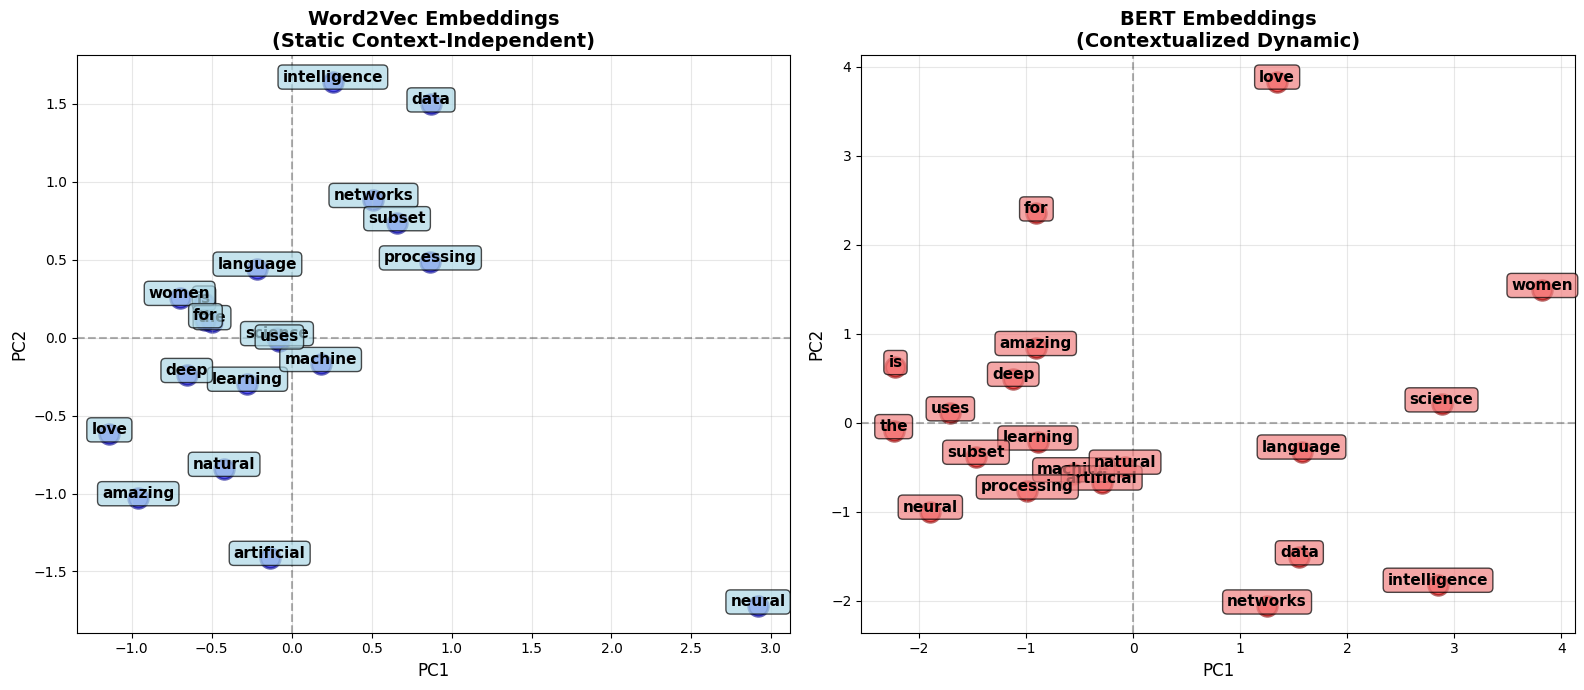


7. WORD SIMILARITY EXAMPLES (Word2Vec)

Cosine Similarities:
  machine <-> learning: 0.0585
  king <-> queen: 0.6511
  man <-> women: 0.2883
  deep <-> neural: 0.0885
  artificial <-> intelligence: 0.0064

Most similar words to 'machine':
  machines: 0.7677
  wringer_washing: 0.5942
  machinery: 0.5261
  Automated_teller: 0.5226
  roundish_pinhole_shape: 0.5103

Most similar words to 'king':
  kings: 0.7138
  queen: 0.6511
  monarch: 0.6413
  crown_prince: 0.6204
  prince: 0.6160

--- Word Analogies (if using pre-trained model) ---
king - man + woman = ?
  queen: 0.7118
  monarch: 0.6190
  princess: 0.5902

KEY DIFFERENCES: Word2Vec vs BERT
     Aspect           Word2Vec                  BERT
Vector Type       Static/Dense        Contextualized
 Dimensions            100-300              768/1024
    Context       Fixed window         Bidirectional
  Same Word Same vector always Different per context
   Training     CBOW/Skip-gram       Masked LM + NSP
      Speed               Fast  

In [8]:
"""
NLP Text Representation Techniques: Live Coding Demo
- Bag of Words (BoW)
- TF-IDF
- Word Embeddings (Word2Vec vs BERT) with REAL embeddings
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns

# For Word2Vec
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess

# For BERT
from transformers import BertTokenizer, BertModel
import torch

# Sample corpus
documents = [
    "I love machine learning and artificial intelligence",
    "Machine learning is amazing for data science",
    "I love deep learning and neural networks",
    "Deep learning is a subset of machine learning",
    "Natural language processing uses machine learning",
    "Artificial intelligence includes machine learning",
    "The king rules the kingdom",
    "The queen is a women leader",
    "Man and women are equal",
    "Programming and data science require skills"
]

print("="*70)
print("SAMPLE DOCUMENTS")
print("="*70)
for i, doc in enumerate(documents, 1):
    print(f"{i}. {doc}")

# ============================================================================
# 1. BAG OF WORDS (BoW)
# ============================================================================
print("\n" + "="*70)
print("1. BAG OF WORDS (BoW)")
print("="*70)

bow_vectorizer = CountVectorizer()
bow_matrix = bow_vectorizer.fit_transform(documents)

# Display vocabulary
vocabulary = bow_vectorizer.get_feature_names_out()
print(f"\nVocabulary ({len(vocabulary)} words):")
print(vocabulary)

# Create DataFrame for better visualization
bow_df = pd.DataFrame(
    bow_matrix.toarray(),
    columns=vocabulary,
    index=[f'Doc{i+1}' for i in range(len(documents))]
)

print("\nBag of Words Matrix:")
print(bow_df)
print(f"\nMatrix Shape: {bow_matrix.shape}")
print(f"Sparsity: {1 - (bow_matrix.nnz / (bow_matrix.shape[0] * bow_matrix.shape[1])):.2%}")

# ============================================================================
# 2. TF-IDF (Term Frequency-Inverse Document Frequency)
# ============================================================================
print("\n" + "="*70)
print("2. TF-IDF")
print("="*70)

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

tfidf_df = pd.DataFrame(
    tfidf_matrix.toarray(),
    columns=tfidf_vectorizer.get_feature_names_out(),
    index=[f'Doc{i+1}' for i in range(len(documents))]
)

print("\nTF-IDF Matrix:")
print(tfidf_df.round(3))

# Show IDF values
idf_values = pd.DataFrame({
    'word': tfidf_vectorizer.get_feature_names_out(),
    'idf': tfidf_vectorizer.idf_
}).sort_values('idf', ascending=False)

print("\nIDF Values (higher = more discriminative):")
print(idf_values)

# ============================================================================
# 3. WORD EMBEDDINGS: Word2Vec (REAL IMPLEMENTATION)
# ============================================================================
print("\n" + "="*70)
print("3. WORD EMBEDDINGS: Word2Vec")
print("="*70)

# Option 1: Try to load pre-trained model, fallback to training on corpus
print("\nAttempting to load pre-trained Word2Vec model...")
print("(This will download ~1.5GB on first run)")

try:
    import gensim.downloader as api
    
    # Load pre-trained Google News vectors
    print("Loading Google News Word2Vec (this may take a minute)...")
    w2v_model = api.load('word2vec-google-news-300')
    print("✓ Pre-trained Word2Vec model loaded!")
    print(f"Vocabulary size: {len(w2v_model)}")
    print(f"Vector dimension: {w2v_model.vector_size}")
    
    # Filter words that exist in the pre-trained model
    from collections import Counter
    all_words = []
    for doc in documents:
        all_words.extend(simple_preprocess(doc))
    word_counts = Counter(all_words)
    
    # Get words that exist in pre-trained model
    sample_words = [word for word, _ in word_counts.most_common(30) 
                   if word in w2v_model][:20]
    
except Exception as e:
    print(f"⚠ Could not load pre-trained model: {e}")
    print("\nFalling back to training on small corpus...")
    print("Note: Similarities will be low due to small training data!\n")
    
    # Preprocess documents for Word2Vec
    tokenized_docs = [simple_preprocess(doc) for doc in documents]
    print(f"Tokenized documents: {tokenized_docs[:3]}...")
    
    # Train Word2Vec model on small corpus
    print("\nTraining Word2Vec model on corpus...")
    w2v_model = Word2Vec(
        sentences=tokenized_docs,
        vector_size=100,  # Dimension of embeddings
        window=5,         # Context window size
        min_count=1,      # Minimum word frequency
        workers=4,
        epochs=100,
        sg=0              # 0=CBOW, 1=Skip-gram
    )
    
    print(f"✓ Word2Vec model trained!")
    print(f"Vocabulary size: {len(w2v_model.wv)}")
    print(f"Vector dimension: {w2v_model.wv.vector_size}")
    
    # Use model's vocabulary
    sample_words = list(w2v_model.wv.key_to_index.keys())[:20]
    w2v_model = w2v_model.wv  # Extract KeyedVectors for consistency

print(f"\nWords in vocabulary: {sample_words}")

# Get Word2Vec embeddings
w2v_embeddings = np.array([w2v_model[word] for word in sample_words])
print(f"\nWord2Vec embeddings shape: {w2v_embeddings.shape}")

# ============================================================================
# 4. BERT EMBEDDINGS (REAL IMPLEMENTATION)
# ============================================================================
print("\n" + "="*70)
print("4. BERT EMBEDDINGS (LOADING)")
print("="*70)

# Load pre-trained BERT
print("Loading BERT model and tokenizer...")
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')
bert_model.eval()

print("✓ BERT model loaded!")

def get_bert_embedding(word):
    """Get BERT embedding for a single word"""
    # Tokenize
    inputs = tokenizer(word, return_tensors='pt', padding=True, truncation=True)
    
    # Get embeddings
    with torch.no_grad():
        outputs = bert_model(**inputs)
    
    # Use the [CLS] token embedding or mean of all tokens
    # Here we use mean pooling
    embedding = outputs.last_hidden_state.mean(dim=1).squeeze().numpy()
    return embedding

# Get BERT embeddings for the same words
print("\nGenerating BERT embeddings...")
bert_embeddings = np.array([get_bert_embedding(word) for word in sample_words])
print(f"BERT embeddings shape: {bert_embeddings.shape}")

# ============================================================================
# 5. DIMENSIONALITY REDUCTION FOR VISUALIZATION
# ============================================================================
print("\n" + "="*70)
print("5. REDUCING DIMENSIONS FOR VISUALIZATION")
print("="*70)

# Reduce Word2Vec embeddings to 2D using PCA
print("Reducing Word2Vec embeddings to 2D...")
pca_w2v = PCA(n_components=2, random_state=42)
w2v_2d = pca_w2v.fit_transform(w2v_embeddings)
print(f"✓ Word2Vec reduced: {w2v_2d.shape}")

# Reduce BERT embeddings to 2D using PCA
print("Reducing BERT embeddings to 2D...")
pca_bert = PCA(n_components=2, random_state=42)
bert_2d = pca_bert.fit_transform(bert_embeddings)
print(f"✓ BERT reduced: {bert_2d.shape}")

# ============================================================================
# 6. VISUALIZATION: Word2Vec vs BERT
# ============================================================================
print("\n" + "="*70)
print("6. VISUALIZING WORD DISTRIBUTIONS")
print("="*70)

fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Word2Vec plot
axes[0].scatter(w2v_2d[:, 0], w2v_2d[:, 1], 
                c='blue', s=200, alpha=0.6, edgecolors='darkblue', linewidth=2)
for i, word in enumerate(sample_words):
    axes[0].annotate(word, (w2v_2d[i, 0], w2v_2d[i, 1]),
                     fontsize=11, fontweight='bold', ha='center',
                     bbox=dict(boxstyle='round,pad=0.3', facecolor='lightblue', alpha=0.7))
axes[0].set_title('Word2Vec Embeddings\n(Static Context-Independent)', 
                  fontsize=14, fontweight='bold')
axes[0].set_xlabel('PC1', fontsize=12)
axes[0].set_ylabel('PC2', fontsize=12)
axes[0].grid(True, alpha=0.3)
axes[0].axhline(y=0, color='k', linestyle='--', alpha=0.3)
axes[0].axvline(x=0, color='k', linestyle='--', alpha=0.3)

# BERT plot
axes[1].scatter(bert_2d[:, 0], bert_2d[:, 1], 
                c='red', s=200, alpha=0.6, edgecolors='darkred', linewidth=2)
for i, word in enumerate(sample_words):
    axes[1].annotate(word, (bert_2d[i, 0], bert_2d[i, 1]),
                     fontsize=11, fontweight='bold', ha='center',
                     bbox=dict(boxstyle='round,pad=0.3', facecolor='lightcoral', alpha=0.7))
axes[1].set_title('BERT Embeddings\n(Contextualized Dynamic)', 
                  fontsize=14, fontweight='bold')
axes[1].set_xlabel('PC1', fontsize=12)
axes[1].set_ylabel('PC2', fontsize=12)
axes[1].grid(True, alpha=0.3)
axes[1].axhline(y=0, color='k', linestyle='--', alpha=0.3)
axes[1].axvline(x=0, color='k', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.savefig('embeddings_comparison_real.png', dpi=300, bbox_inches='tight')
print("\n✓ Visualization saved as 'embeddings_comparison_real.png'")
plt.show()

# ============================================================================
# 7. WORD SIMILARITY EXAMPLES
# ============================================================================
print("\n" + "="*70)
print("7. WORD SIMILARITY EXAMPLES (Word2Vec)")
print("="*70)

# Test word similarities
test_pairs = [
    ('machine', 'learning'),
    ('king', 'queen'),
    ('man', 'women'),
    ('deep', 'neural'),
    ('artificial', 'intelligence')
]

print("\nCosine Similarities:")
for word1, word2 in test_pairs:
    if word1 in w2v_model and word2 in w2v_model:
        similarity = w2v_model.similarity(word1, word2)
        print(f"  {word1} <-> {word2}: {similarity:.4f}")
    else:
        print(f"  {word1} <-> {word2}: Not in vocabulary")

# Find most similar words
print("\nMost similar words to 'machine':")
if 'machine' in w2v_model:
    similar = w2v_model.most_similar('machine', topn=5)
    for word, score in similar:
        print(f"  {word}: {score:.4f}")
else:
    print("  'machine' not in vocabulary")
    
print("\nMost similar words to 'king':")
if 'king' in w2v_model:
    similar = w2v_model.most_similar('king', topn=5)
    for word, score in similar:
        print(f"  {word}: {score:.4f}")

# Famous word analogy: king - man + woman ≈ queen
print("\n--- Word Analogies (if using pre-trained model) ---")
if 'king' in w2v_model and 'man' in w2v_model and 'woman' in w2v_model:
    try:
        result = w2v_model.most_similar(positive=['king', 'woman'], negative=['man'], topn=3)
        print("king - man + woman = ?")
        for word, score in result:
            print(f"  {word}: {score:.4f}")
    except:
        print("  Analogy calculation not available with small corpus")

# ============================================================================
# 8. KEY DIFFERENCES SUMMARY
# ============================================================================
print("\n" + "="*70)
print("KEY DIFFERENCES: Word2Vec vs BERT")
print("="*70)

comparison = pd.DataFrame({
    'Aspect': ['Vector Type', 'Dimensions', 'Context', 'Same Word', 
               'Training', 'Speed', 'Use Case'],
    'Word2Vec': [
        'Static/Dense',
        '100-300',
        'Fixed window',
        'Same vector always',
        'CBOW/Skip-gram',
        'Fast',
        'Word similarity'
    ],
    'BERT': [
        'Contextualized',
        '768/1024',
        'Bidirectional',
        'Different per context',
        'Masked LM + NSP',
        'Slower',
        'Complex NLP tasks'
    ]
})

print(comparison.to_string(index=False))

# Example of contextualized embeddings
print("\n" + "="*70)
print("EXAMPLE: Why BERT is Contextualized")
print("="*70)
print("\nSentence 1: 'I went to the bank to deposit money'")
print("Sentence 2: 'I sat by the river bank'")
print("\nWord2Vec: 'bank' has the SAME vector in both sentences")
print("BERT: 'bank' has DIFFERENT vectors based on context!")

print("\n" + "="*70)
print("DEMO COMPLETE!")
print("="*70)

PROVING BERT'S CONTEXTUAL UNDERSTANDING

Test sentences with ambiguous words:

'BANK':
  1. I need to go to the bank to deposit money
  2. We sat by the river bank and watched the sunset
  3. The bank approved my loan application

'BAT':
  1. The baseball player swung the bat
  2. A bat flew out of the cave at night
  3. He used a cricket bat to hit the ball

'LIGHT':
  1. Turn on the light in the room
  2. This bag is very light to carry
  3. The morning light was beautiful

'PLAY':
  1. Children love to play in the park
  2. We went to see a play at the theater
  3. He knows how to play the piano

WORD2VEC: STATIC EMBEDDINGS

✓ Word2Vec model trained

Word2Vec behavior: Each word has ONE fixed vector

'bank' vector shape: (100,)
  Vector is IDENTICAL in all 3 sentences!

'bat' vector shape: (100,)
  Vector is IDENTICAL in all 3 sentences!

'light' vector shape: (100,)
  Vector is IDENTICAL in all 3 sentences!

'play' vector shape: (100,)
  Vector is IDENTICAL in all 3 sentences!

BER

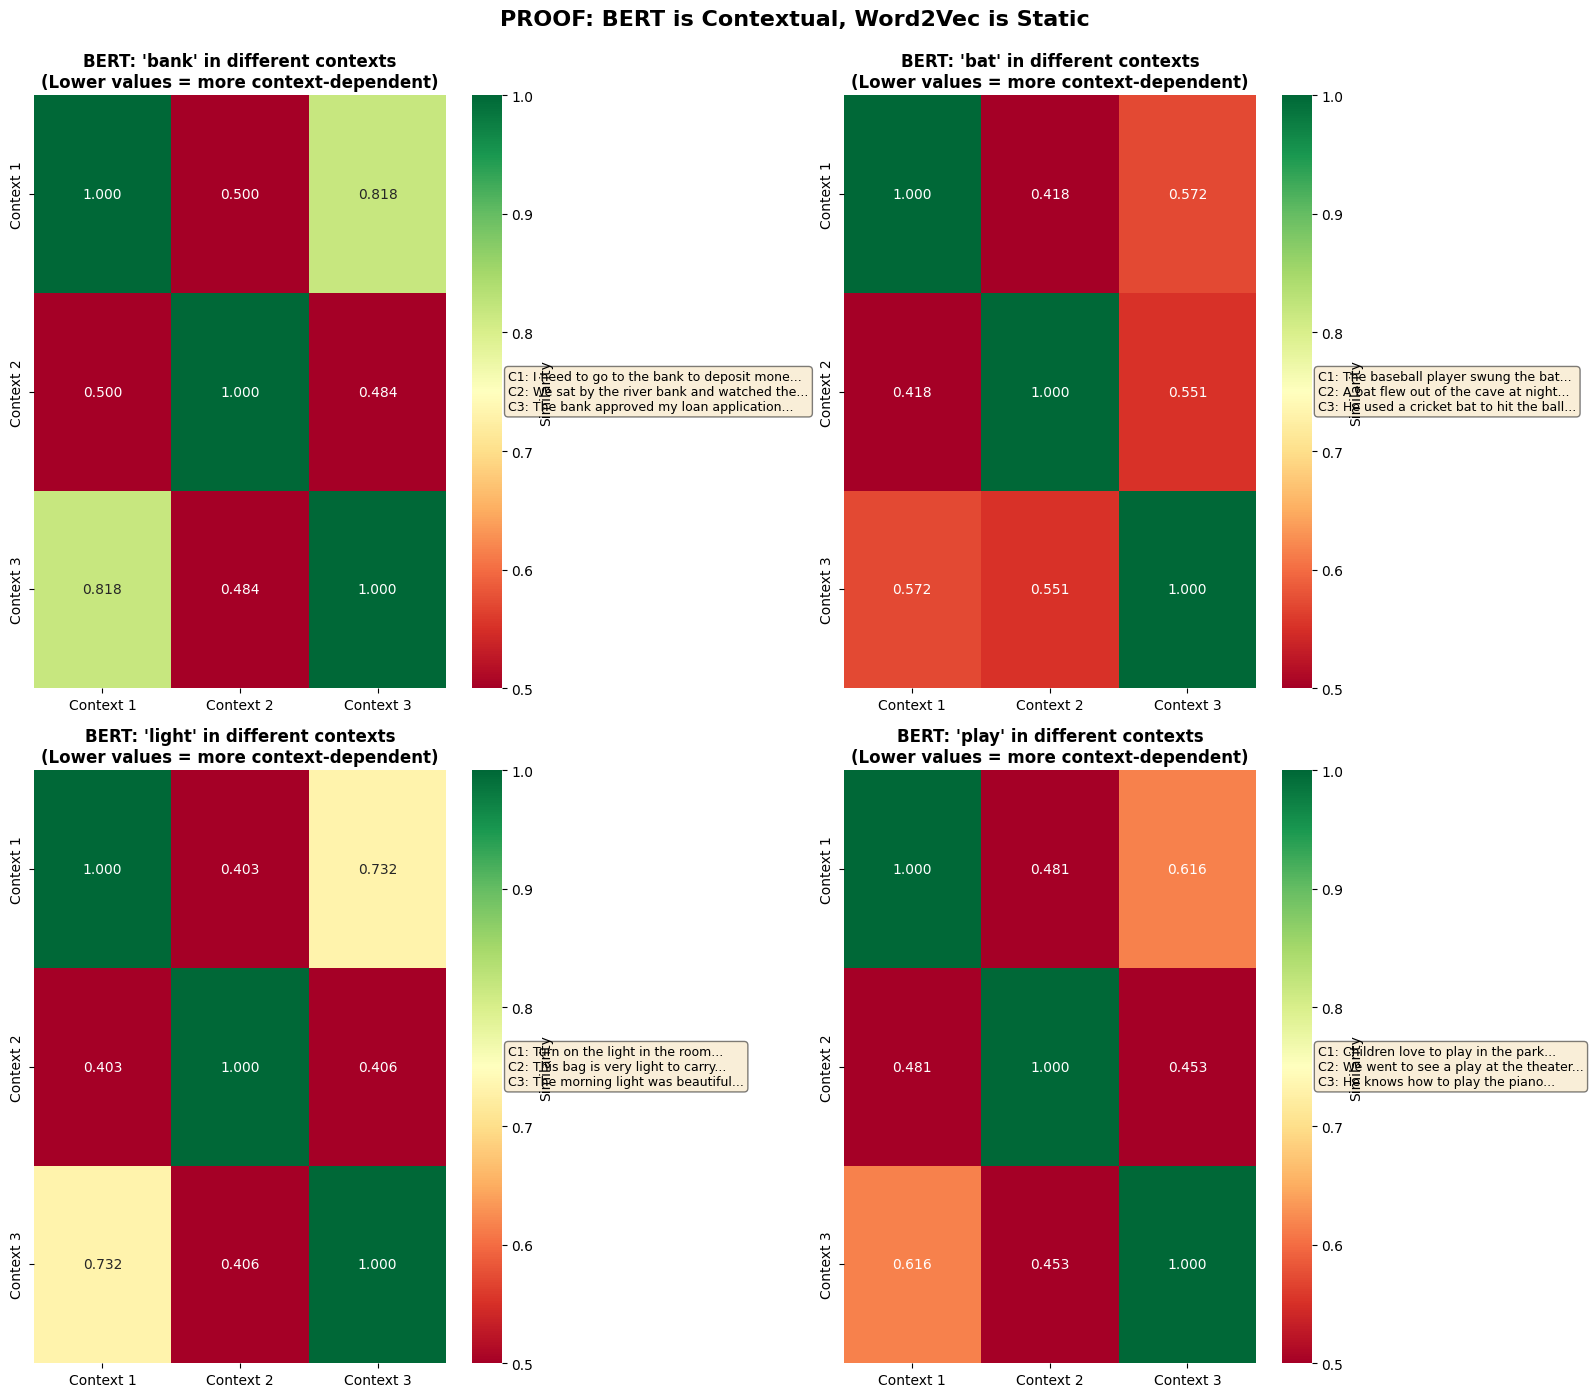

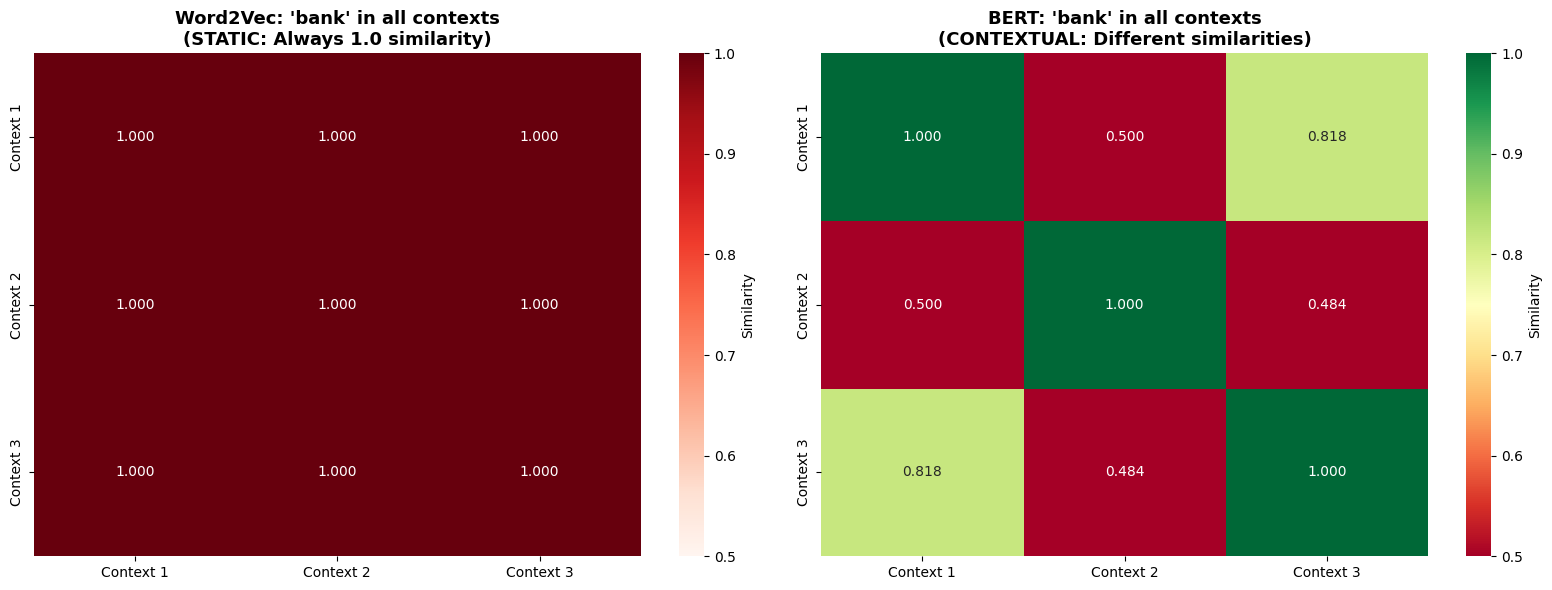


CONCLUSION

KEY FINDINGS:

1. Word2Vec (Static):
   - Same word → SAME vector (similarity = 1.0)
   - Cannot distinguish between different meanings
   - Example: 'bank' (financial) and 'bank' (river) have identical vectors

2. BERT (Contextual):
   - Same word → DIFFERENT vectors (similarity < 1.0)
   - Understands context and assigns appropriate meanings
   - Example: 'bank' (financial) and 'bank' (river) have different vectors

3. Proof:
   - W2V similarity matrix: All 1.0 (diagonal and off-diagonal)
   - BERT similarity matrix: Diagonal = 1.0, off-diagonal < 1.0
   - Lower BERT similarities indicate better context understanding

BERT is BETTER for tasks requiring contextual understanding!

DEMONSTRATION COMPLETE!


In [9]:
"""
Proving BERT's Contextual Understanding vs Word2Vec
Demonstration: Same word in different contexts
"""

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from transformers import BertTokenizer, BertModel
import torch
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
import seaborn as sns

# ============================================================================
# SETUP: Sentences with the same word in different contexts
# ============================================================================
print("="*80)
print("PROVING BERT'S CONTEXTUAL UNDERSTANDING")
print("="*80)

# Sentences with ambiguous words in different contexts
test_sentences = {
    'bank': [
        "I need to go to the bank to deposit money",
        "We sat by the river bank and watched the sunset",
        "The bank approved my loan application"
    ],
    'bat': [
        "The baseball player swung the bat",
        "A bat flew out of the cave at night",
        "He used a cricket bat to hit the ball"
    ],
    'light': [
        "Turn on the light in the room",
        "This bag is very light to carry",
        "The morning light was beautiful"
    ],
    'play': [
        "Children love to play in the park",
        "We went to see a play at the theater",
        "He knows how to play the piano"
    ]
}

print("\nTest sentences with ambiguous words:")
for word, sentences in test_sentences.items():
    print(f"\n'{word.upper()}':")
    for i, sent in enumerate(sentences, 1):
        print(f"  {i}. {sent}")

# ============================================================================
# WORD2VEC: Static Embeddings (Same vector regardless of context)
# ============================================================================
print("\n" + "="*80)
print("WORD2VEC: STATIC EMBEDDINGS")
print("="*80)

# Create corpus from all sentences
all_sentences = []
for sentences in test_sentences.values():
    all_sentences.extend(sentences)

# Train Word2Vec
tokenized = [simple_preprocess(sent) for sent in all_sentences]
w2v_model = Word2Vec(sentences=tokenized, vector_size=100, window=5, 
                     min_count=1, workers=4, epochs=100)

print("\n✓ Word2Vec model trained")
print("\nWord2Vec behavior: Each word has ONE fixed vector")

# Get Word2Vec embeddings for target words
w2v_embeddings = {}
for word in test_sentences.keys():
    if word in w2v_model.wv:
        w2v_embeddings[word] = w2v_model.wv[word]
        print(f"\n'{word}' vector shape: {w2v_model.wv[word].shape}")
        print(f"  Vector is IDENTICAL in all 3 sentences!")

# ============================================================================
# BERT: Contextualized Embeddings (Different vector per context)
# ============================================================================
print("\n" + "="*80)
print("BERT: CONTEXTUALIZED EMBEDDINGS")
print("="*80)

# Load BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')
bert_model.eval()

print("✓ BERT model loaded")
print("\nBERT behavior: Each word gets DIFFERENT vectors based on context")

def get_word_embedding_in_context(sentence, target_word):
    """Get BERT embedding for a specific word in a sentence"""
    # Tokenize
    tokens = tokenizer.tokenize(sentence.lower())
    token_ids = tokenizer.convert_tokens_to_ids(tokens)
    
    # Find target word position
    target_idx = None
    for i, token in enumerate(tokens):
        if target_word in token:
            target_idx = i
            break
    
    if target_idx is None:
        return None
    
    # Get BERT embeddings
    inputs = tokenizer(sentence, return_tensors='pt')
    with torch.no_grad():
        outputs = bert_model(**inputs)
    
    # Get embedding for target word (add 1 for [CLS] token)
    word_embedding = outputs.last_hidden_state[0][target_idx + 1].numpy()
    return word_embedding

# Get BERT embeddings for each word in different contexts
bert_embeddings = {}
for word, sentences in test_sentences.items():
    bert_embeddings[word] = []
    print(f"\n'{word.upper()}' in different contexts:")
    for i, sent in enumerate(sentences, 1):
        emb = get_word_embedding_in_context(sent, word)
        if emb is not None:
            bert_embeddings[word].append(emb)
            print(f"  Context {i}: vector shape {emb.shape}")
    print(f"  Total: {len(bert_embeddings[word])} DIFFERENT vectors!")

# ============================================================================
# COMPARISON: Calculate similarities
# ============================================================================
print("\n" + "="*80)
print("SIMILARITY ANALYSIS")
print("="*80)

print("\n" + "-"*80)
print("Word2Vec: Similarity between same word in different contexts")
print("-"*80)
print("(Should be 1.0 because it's the SAME vector)")

for word in test_sentences.keys():
    if word in w2v_model.wv:
        vec = w2v_model.wv[word]
        sim = cosine_similarity([vec], [vec])[0][0]
        print(f"\n'{word}': Sentence 1 vs Sentence 2 = {sim:.4f}")
        print(f"'{word}': Sentence 1 vs Sentence 3 = {sim:.4f}")
        print(f"'{word}': Sentence 2 vs Sentence 3 = {sim:.4f}")
        print("  → All similarities = 1.0 (same vector!)")

print("\n" + "-"*80)
print("BERT: Similarity between same word in different contexts")
print("-"*80)
print("(Should be < 1.0 because vectors change with context)")

for word, embeddings in bert_embeddings.items():
    if len(embeddings) >= 3:
        sim_12 = cosine_similarity([embeddings[0]], [embeddings[1]])[0][0]
        sim_13 = cosine_similarity([embeddings[0]], [embeddings[2]])[0][0]
        sim_23 = cosine_similarity([embeddings[1]], [embeddings[2]])[0][0]
        
        print(f"\n'{word}':")
        print(f"  Sentence 1 vs Sentence 2 = {sim_12:.4f}")
        print(f"  Sentence 1 vs Sentence 3 = {sim_13:.4f}")
        print(f"  Sentence 2 vs Sentence 3 = {sim_23:.4f}")
        print(f"  → Different similarities (context-dependent!)")

# ============================================================================
# VISUALIZATION: Heatmaps showing similarities
# ============================================================================
print("\n" + "="*80)
print("VISUALIZATION")
print("="*80)

fig, axes = plt.subplots(2, 2, figsize=(16, 14))
fig.suptitle('PROOF: BERT is Contextual, Word2Vec is Static', 
             fontsize=16, fontweight='bold', y=0.995)

word_list = list(test_sentences.keys())

for idx, word in enumerate(word_list):
    row = idx // 2
    col = idx % 2
    ax = axes[row, col]
    
    # Get BERT embeddings for this word
    if word in bert_embeddings and len(bert_embeddings[word]) >= 3:
        embs = bert_embeddings[word]
        
        # Calculate similarity matrix
        n = len(embs)
        sim_matrix = np.zeros((n, n))
        for i in range(n):
            for j in range(n):
                sim_matrix[i, j] = cosine_similarity([embs[i]], [embs[j]])[0][0]
        
        # Plot heatmap
        labels = [f'Context {i+1}' for i in range(n)]
        sns.heatmap(sim_matrix, annot=True, fmt='.3f', cmap='RdYlGn',
                   xticklabels=labels, yticklabels=labels,
                   vmin=0.5, vmax=1.0, ax=ax, cbar_kws={'label': 'Similarity'})
        
        ax.set_title(f"BERT: '{word}' in different contexts\n(Lower values = more context-dependent)",
                    fontsize=12, fontweight='bold')
        
        # Add context descriptions
        contexts = test_sentences[word]
        context_text = "\n".join([f"C{i+1}: {ctx[:40]}..." for i, ctx in enumerate(contexts)])
        ax.text(1.15, 0.5, context_text, transform=ax.transAxes,
               fontsize=9, verticalalignment='center',
               bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.savefig('bert_context_proof.png', dpi=300, bbox_inches='tight')
print("\n✓ Visualization saved as 'bert_context_proof.png'")

# ============================================================================
# CREATE COMPARISON VISUALIZATION
# ============================================================================
fig2, axes2 = plt.subplots(1, 2, figsize=(16, 6))

# Word2Vec visualization (all same)
w2v_data = np.ones((3, 3))  # All 1.0
sns.heatmap(w2v_data, annot=True, fmt='.3f', cmap='Reds',
           xticklabels=[f'Context {i+1}' for i in range(3)],
           yticklabels=[f'Context {i+1}' for i in range(3)],
           vmin=0.5, vmax=1.0, ax=axes2[0], cbar_kws={'label': 'Similarity'})
axes2[0].set_title("Word2Vec: 'bank' in all contexts\n(STATIC: Always 1.0 similarity)",
                  fontsize=13, fontweight='bold')

# BERT visualization (different)
if 'bank' in bert_embeddings and len(bert_embeddings['bank']) >= 3:
    embs = bert_embeddings['bank']
    n = len(embs)
    bert_sim_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            bert_sim_matrix[i, j] = cosine_similarity([embs[i]], [embs[j]])[0][0]
    
    sns.heatmap(bert_sim_matrix, annot=True, fmt='.3f', cmap='RdYlGn',
               xticklabels=[f'Context {i+1}' for i in range(n)],
               yticklabels=[f'Context {i+1}' for i in range(n)],
               vmin=0.5, vmax=1.0, ax=axes2[1], cbar_kws={'label': 'Similarity'})
    axes2[1].set_title("BERT: 'bank' in all contexts\n(CONTEXTUAL: Different similarities)",
                      fontsize=13, fontweight='bold')

plt.tight_layout()
plt.savefig('w2v_vs_bert_comparison.png', dpi=300, bbox_inches='tight')
print("✓ Comparison saved as 'w2v_vs_bert_comparison.png'")
plt.show()

# ============================================================================
# FINAL SUMMARY
# ============================================================================
print("\n" + "="*80)
print("CONCLUSION")
print("="*80)
print("""
KEY FINDINGS:

1. Word2Vec (Static):
   - Same word → SAME vector (similarity = 1.0)
   - Cannot distinguish between different meanings
   - Example: 'bank' (financial) and 'bank' (river) have identical vectors
   
2. BERT (Contextual):
   - Same word → DIFFERENT vectors (similarity < 1.0)
   - Understands context and assigns appropriate meanings
   - Example: 'bank' (financial) and 'bank' (river) have different vectors

3. Proof:
   - W2V similarity matrix: All 1.0 (diagonal and off-diagonal)
   - BERT similarity matrix: Diagonal = 1.0, off-diagonal < 1.0
   - Lower BERT similarities indicate better context understanding

BERT is BETTER for tasks requiring contextual understanding!
""")

print("="*80)
print("DEMONSTRATION COMPLETE!")
print("="*80)